***
# Лабораторная работа№7 
## Вариант 14

Решить неявным методом Адамса при $k=1$ задачу Коши 
$$5y'' + 8y' + 4y = x\cdot\exp(-x),\hspace{5mm}y(0) = 1, y'(0) = 0,\hspace{5mm}x\in [0, 2]$$

с заданной относительной точностью 0,01.
Требуется построение графиков решения $y(x), y'(x)$, а также фазовых траекторий. За своевременное выполнение задания начисляется **6 баллов**. Дополнительные **3 балла** будут начислены, если будет найдено точное решение и оно будет сопоставлено (построены соответствующие разностные графики) с полученным приближенным решением. Еще **3 балла** будут начислены, если решение задачи Коши будет найденно с помощью встроенных функций и оно также будет сопоставлено (построены соответствующие разностные графики) с исходным приближенным решением.  
Для того, чтобы лабораторная работа была засчитана требуется оформление отчета (с формулами) с описанием используемых методов в формате Jupyter Notebook.

### Точное решение
$$y{\left(x \right)} = \left( \frac{1}{2}\sin{\left( 0.4x \right)} - \cos{\left( 0.4x \right)}\right)e^{-0.8x} +  e^{-  x}{\left(x+2\right)}$$

$$y'(x) =\left(  \cos{\left( 0.4x \right)}\right)e^{-0.8x} +  e^{-  x}{\left(-x-1\right)}$$


### Метод Адамса
Конечноразностный многошаговый метод численного интегрирования обыкновенных дифференциальных уравнений первого порядка

Расчётные формулы метода Адамса для решения этой системы имеют вид:

Интерполяционные или неявные — метод Адамса-Мультона
$$y_{n+1}=y_{n}+h\int\limits_{\lambda=0}^{k-1}\mathcal{V}_{-\lambda}f\left(x_{\lambda-k},y_{\lambda-k}\right)$$

где $\mathcal{V}_{-\lambda}$ это вычисляемые постоянные.

При одном и том же  $k$  формула  точнее, но требует решения нелинейной системы уравнений для нахождения значения $y_{n+1}$ . На практике находят приближение из явного метода Адамса-Башфорта, а затем приводят одно или несколько уточнений по формуле

$$y_{n+1}^{(i+1)}=y_{n}+h\int\limits_{\lambda=0}^{k-1}\mathcal{V}_{-\lambda}f\left(x_{\lambda-k},y_{\lambda-k}\right)+h\mathcal{V}_{1}f\left(x_{n+1},y_{n+1}^{(i)}\right)$$


### Метод Адамса-Мультона(при$k=1$)

Неявные методы Адамса — Мультона

$$y_{n+1}=y_{n}+hf\left(t_{n},y_{n}\right) $$ 

$$y_{n+1}=y_{n}+\frac{h}{2}\left(f\left(t_{n},y_{n}\right)+(f\left(t_{n+1},y_{n+1}\right)\right) $$

$y(0) = 1$  
$y'(0) = 0$  
$y''(0) = -0.8$  

h*=  0.015625


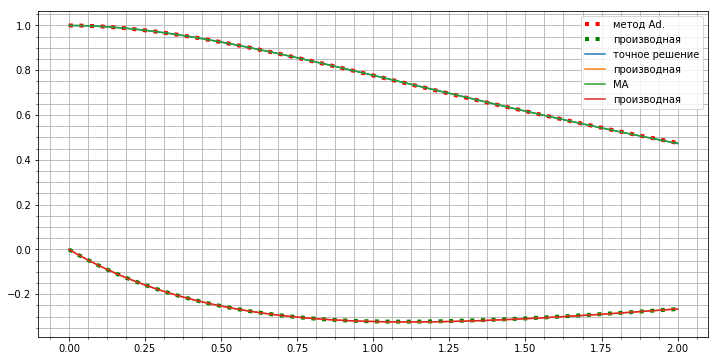

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import integrate

h = 0.01
def MA(h):
    x = np.arange(0, 2 + h, h)

    y = np.zeros_like(x)
    dy = np.zeros_like(x)
    d2y = np.zeros_like(x)

    y[0], dy[0], d2y[0] = 1, 0, -0.8

    y[1] = y[0] + h*dy[0]
    dy[1] = dy[0] + h*d2y[0]
    d2y[1] = (np.exp(-x[1])*x[1] - 8*dy[1] - 4*y[1])/5


    for i in range(0, len(x) - 2):
        y[i+1] = y[i] + h*dy[i+1]
        dy[i+1] = dy[i] + h*d2y[i+1]
        d2y[i+1] = (np.exp(-x[i+1])*x[i+1] - 8*dy[i+1] - 4*y[i+1])/5
        y[i+2] = y[i+1] + h/2*(dy[i+2] + dy[i+1])
        dy[i+2] = dy[i+1] + h/2*(d2y[i+2] + d2y[i+1])
        d2y[i+2] = (np.exp(-x[i+2])*x[i+2] - 8*dy[i+2] - 4*y[i+2])/5
    return x,y,dy
def shag(h=0.5,E=0.001):
    a= True
    i = 0

    while a:
        i += 1
        x, y, dy = MA(h)
        h /= 2
        x, y1, dy1 = MA(h)
        y1 = y1[::2]
        dy1 = dy1[::2]
        a = max(abs(y1 - y)) > E and max(abs(dy1 - dy)) > E

    return h, i    
h,it=shag()
print("h*= ",h)
x, y, dy = MA(h)
# Решение найденное с помощью встроенных функций
def se_solve(Y, x):
    return [Y[1], (np.exp(-x)*x - 8*Y[1] - 4*Y[0])/5]

sol_0 = [1, 0]
ys = np.zeros_like(x)
dys = np.zeros_like(x)

sol = integrate.odeint(se_solve, sol_0, x, atol=h)

ys[:] = sol[:, 0]
dys[:] = sol[:, 1]

# Точное решение
yt = np.exp(-0.8*x)*(1/2 * np.sin(0.4*x) - np.cos(0.4*x)) + np.exp(-x)*(x + 2)
dyt = np.exp(-0.8*x)*np.cos(0.4*x) + np.exp(-x)*(-x - 1)

plt.figure(figsize=(12, 6))
plt.plot(x, ys, 'r:', lw=4, label="метод Ad.")
plt.plot(x, dys, 'g:', lw=4, label="производная")
plt.plot(x, yt, label="точное решение")
plt.plot(x, dyt, label="производная")
plt.plot(x, y, label="MA")
plt.plot(x, dy, label="производная")

plt.minorticks_on()

plt.legend(loc='best')
plt.grid(which='both')

plt.show()

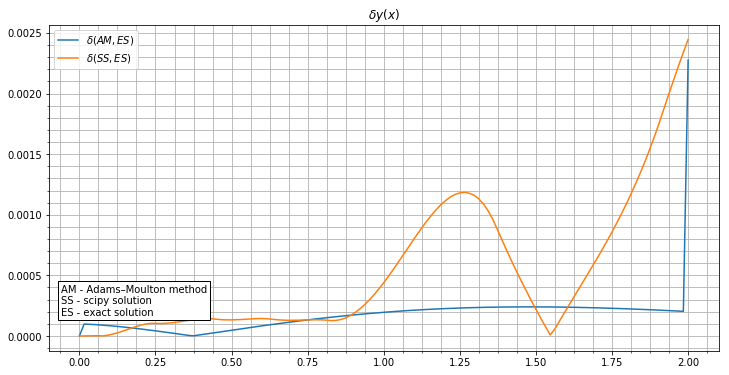

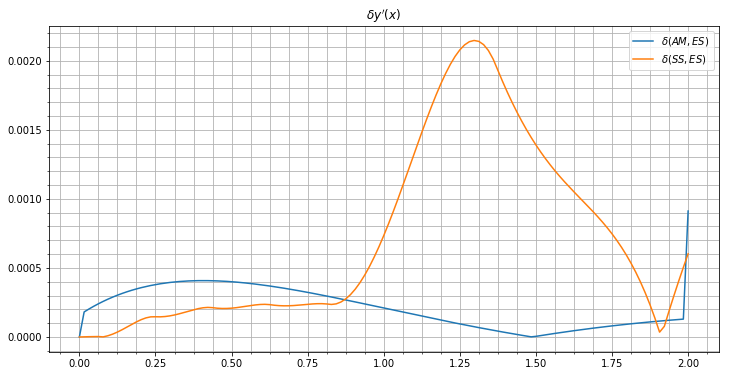

In [6]:
# Разностные графики
plt.figure(figsize=(12, 6))
plt.plot(x, abs(yt - y), label=r"$\delta(AM, ES)$")
plt.plot(x, abs(yt - ys), label=r"$\delta(SS, ES)$")
#plt.plot(x, abs(y - ys), label=r"$\delta(TM, SS)$")

plt.minorticks_on()
plt.text(-0.06, 1.7e-4, 
         'AM - Adams–Moulton method\nSS - scipy solution\nES - exact solution', 
         bbox={"facecolor": "white",
               "boxstyle": "square"})

plt.title(r'$\delta y(x)$')
plt.legend(loc='best')
plt.grid(which='both')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x, abs(dyt - dy), label=r"$\delta(AM, ES)$")
plt.plot(x, abs(dyt - dys), label=r"$\delta(SS, ES)$")
#plt.plot(x, abs(dy - dys), label=r"$\delta(TM, SS)$")

plt.minorticks_on()

plt.title(r"$\delta y'(x)$")
plt.legend(loc='best')
plt.grid(which='both')
plt.show()

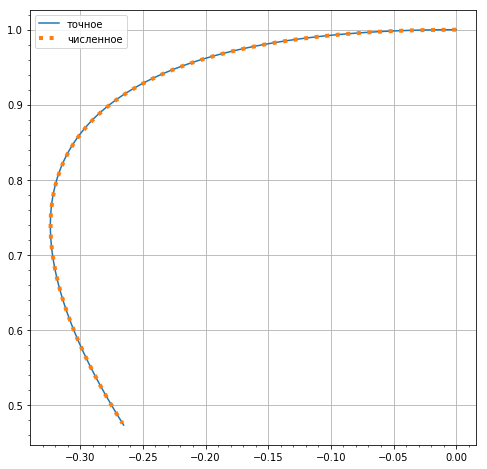

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(dyt, yt, label="точное")
plt.plot(dy, y, ':', lw=4, label="численное")

plt.minorticks_on()

plt.legend(loc='best')
plt.grid(which='major')
plt.show()

**Вывод**

В ходе данной лабораторной работы были использован следущий метод для решения задачи Коши:

Неявным метод Адамса

Найденные решение , с учетом погрешности, совпадает с точным решением и встроенной функцией.